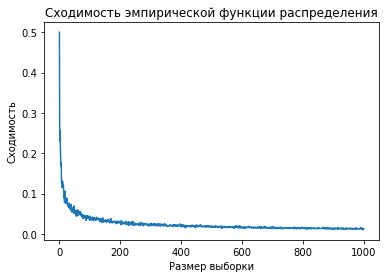

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def empirical_cdf(samples, x): #функция вычисляет эмпирическую функцию распределения для заданного значения x
    count = np.sum(samples <= x)
    return count / len(samples)

def f_raspr(x, a, b): #функция вычисляет функцию распределения(равномерный закон)
    if(x < a):
        return 0
    
    if(a <= x < b):
        return (x - a) / (b - a)
    
    if(x >= b):
        return 1
    

'''
Берем промежуток [a, b] (в данном примере взят (0,1)). t - аргумент функции распределения
'''
a = 0
b = 1
t = 0.5
max_size = 1000 
len_samples = np.array(range(1,max_size)) # Размер выборки n = 1, 2, ... max_size
convergence = []


for n in len_samples:
    res = []
    for _ in range(100):  # Количество экспериментов для усреднения
        x = np.random.uniform(a, b, n)
        res.append(np.abs(empirical_cdf(x, t) - f_raspr(t, a, b))) # |F_n(x) - F(x)|
    convergence.append(np.mean(res))

plt.plot(len_samples, convergence)
plt.xlabel('Размер выборки')
plt.ylabel('Сходимость')
plt.title('Сходимость эмпирической функции распределения')
plt.show()

### На графике показано, что с увеличением размера выборки $(n \rightarrow \infty)$ выполняется $|F_n(x) - F(x)| \rightarrow 0$ 